# Introducción

El término **clustering** hace referencia a un amplio abanico de técnicas cuya finalidad es encontrar *patrones* o *grupos* (clusters) dentro de un conjunto de observaciones. Las particiones se establecen de forma que, las observaciones que están dentro de un mismo grupo, son similares entre ellas y distintas a las observaciones de otros grupos. Se trata de un método de aprendizaje **no supervisado** (unsupervised), ya que el proceso no tiene en cuenta a qué grupo pertenece realmente cada observación (si es que existe tal información). \
Esta característica es la que diferencia al clustering de las métodos de clasificación en el que sí **emplea la verdadera clasificación durante su entrenamiento**.

Dada la utilidad del clustering en disciplinas muy distintas (genómica, marketing...), se han desarrollado multitud de variantes y adaptaciones de sus métodos y algoritmos. Pueden diferenciarse tres grupos principales:

- **Partitioning Clustering**: este tipo de algoritmos requieren que el usuario especifique de antemano el número de clusters que se van a crear (K-means, K-medoids, ...).
- **Hierarchical Clustering**: este tipo de algoritmos no requieren que el usuario especifique de antemano el número de clusters. (agglomerative clustering, divisive clustering).
- Métodos que **combinan** o modifican los anteriores (hierarchical K-means, fuzzy clustering, model based clustering y density based clustering).

<img src="https://juanbretti.com/kschool/Sources\K-means\1_d9khpIO6X0i3ocs3fHzFHQ.webp" height="400">

# Distancia o similitud

El término **distancia** es realmente importante en este algoritmo.

Los métodos de ML basados en la distancia encuentran elementos que son similares en función de esa definición de "distancia". Es decir, que puntos están cerca uno del otro.

La distancia es una función, que dado dos puntos, nos devuelve un escalar que mide la distancia entre ellos.\
Algo fácil de pensar en 2D, ¿pero que tal en 3D, 4D...?

### Funciones de distancia

<img src="https://juanbretti.com/kschool/Sources\KNN\3 Distancias Screenshot 2023-05-21 194510.png" height="400">

Como ejemplo, veamos *Manhattan* y *Euclidean". [Fuente](https://www.omnicalculator.com/math/manhattan-distance)

<img src="https://juanbretti.com/kschool/Sources\KNN\manhattan_distance.jpg" height="300">

Más funciones en [9 Distance Measures in Data Science](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)

<img src="https://juanbretti.com/kschool/Sources\KNN\1_FTVRr_Wqz-3_k6Mk6G4kew.webp" height="400">

# Número óptimo de clusters

Determinar el número óptimo de clusters es uno de los pasos más *complicados* a la hora de aplicar métodos de clustering, sobre todo cuando se trata de *partitioning clustering*, donde el número se tiene que especificar antes de poder ver los resultados. No existe una forma *única* de averiguar el número adecuado de clusters. Es un proceso bastante subjetivo que depende en gran medida del algoritmo empleado y de si se dispone de información previa sobre los datos con los que se está trabajando. A pesar de ello, se han desarrollado varias estrategias que *ayudan* en el proceso.

## Método Elbow
El método Elbow, también conocido como método del **codo**, sigue una estrategia comúnmente empleada para encontrar el valor óptimo de un hiperparámetro. La idea es probar un rango de valores del hiperparámetro en cuestión, representar *gráficamente* los resultados obtenidos con cada uno, e identificar aquel punto de la curva (codo) a partir del cual la mejora deja de ser *notable*. En los casos de partitioning clustering, como por ejemplo K-means, las observaciones se agrupan de una forma tal que se minimiza la varianza total intra-cluster. El método Elbow calcula la *varianza* total intra-cluster en función del número de clusters y escoge como óptimo aquel valor a partir del cual añadir más clusters *apenas consigue mejoría*.

<img src="https://juanbretti.com/kschool/Sources\K-means\elbow 1_cYKFlUsnnVLY4JjhM8kLVA.png" height="400">
<br/><br/>
<img src="https://juanbretti.com/kschool/Sources\K-means\elbow 1_RnvrdhlUxHWss3vOffHT5g.png" height="400">

## Método average silhouette
El método de average silhouette considera como número óptimo de clusters aquel que **maximiza** la media del *silhouette coeficient* de todas las observaciones.

El silhouette coeficient ($si$) cuantifica cómo de buena es la asignación que se ha hecho de una observación comparando su similitud con el resto de observaciones de su cluster frente a las de los otros clusters. Su valor puede estar entre -1 y 1, siendo valores próximos a 1 un indicativo de que la observación se ha asignado al cluster correcto.

- $a_i$: distancia al grupo al que pertenece
- $b_i$: distancia al grupo más cercano al que *no* pertenece.

Se calcular el valor de *silhouette* como:

$$si = \frac{b_i-a_i}{\text{max}(a_i, b_i)}$$

$$Silhouette = \sum_i^N \frac{s_i}{N}$$

Se considera como número óptimo de clusters aquel que *maximiza* la media del *silhouette coeficient* de todas las observaciones.

En [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). En [Wikipedia](https://es.wikipedia.org/wiki/Silhouette_(clustering)).

La definición:

> El mejor valor es 1 y el peor valor es -1. Los valores cercanos a 0 indican la presencia de clusters superpuestos. \
> Los valores negativos generalmente indican que una muestra ha sido asignada al grupo equivocado, ya que otro grupo es más similar.

Ejemplos de distintos valores de [silhouette](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py).

<img src="https://juanbretti.com/kschool/Sources\Jerárquico\1 sphx_glr_plot_kmeans_silhouette_analysis_001.png" height="400">

<img src="https://juanbretti.com/kschool/Sources\Jerárquico\2 sphx_glr_plot_kmeans_silhouette_analysis_005.png" height="400">



# Proceso para desplegar este algoritmo

<img src="https://juanbretti.com/kschool/Sources\K-means\ML1_Segmentation_Presentation_Blended2020.jpg" height="400">

*Fuente:* Mooi, E., & Sarstedt, M. (2011). A concise guide to market research: The process, data, and methods using IBM SPSS statistics. Springer. Chapter 9, page 240 “Steps in a Cluster Analysis”


In [97]:
# Tratamiento de datos
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Analisis RFM

In [4]:
df = pd.read_csv('/Users/luciafrailemorera/00_TFM/Online_eCommerce.csv')

In [6]:
df.head()

Order_Number State_Code   Customer_Name  Order_Date     Status  \
0       139374         AP     Adhir Samal  11/01/2020  Delivered   
1       139375         AP  Dannana Jhammi  11/01/2020  Delivered   
2       139376         AS     Vipin Kumar  11/01/2020  Delivered   
3       139377         BR   Ranjeet Kumar  11/01/2020  Delivered   
4       139378         CG   Sajal Singhal  11/01/2020      Order   

                    Product      Category     Brand    Cost    Sales  \
0                512 GB M.2           SSD   Samsung  6500.0   8450.0   
1      RYZEN 3rd gen. 3500            CPU     Intel  8500.0  11050.0   
2          2GB Graphic Card  Graphic Card    Nvidia  7000.0   9100.0   
3            16 GB DDR4 RAM           RAM     Hynix  6550.0   8515.0   
4  Standard ATX motherboard   MotherBoard  Gigabyte  7650.0   9945.0   

   Quantity  Total_Cost  Total_Sales Assigned Supervisor  
0       1.0      6500.0       8450.0         Ajay Sharma  
1       3.0     25500.0      33150.0        Roshan Kumar  
2       2.0     14000.0      18200.0         Aarvi Gupta  
3       3.0     19650.0      25545.0         Vijay Singh  
4       4.0     30600.0      39780.0          Aadil Khan

In [7]:
df.shape

(5110, 14)

In [9]:
df.dtypes

Order_Number            object
State_Code              object
Customer_Name           object
Order_Date              object
Status                  object
Product                 object
Category                object
Brand                   object
Cost                   float64
Sales                  float64
Quantity               float64
Total_Cost             float64
Total_Sales            float64
Assigned Supervisor     object
dtype: object

In [14]:
df_wo_nulls = df.dropna()

In [17]:
df_wo_nulls['Order_Date'] = pd.to_datetime(df_wo_nulls['Order_Date'], format = 'mixed', dayfirst = True)

/var/folders/nf/ygf63jxn6wnc3z634d9qcwsc0000gn/T/ipykernel_47626/2775665101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wo_nulls['Order_Date'] = pd.to_datetime(df_wo_nulls['Order_Date'], format = 'mixed', dayfirst = True)


In [18]:
df_wo_nulls.dtypes

Order_Number                   object
State_Code                     object
Customer_Name                  object
Order_Date             datetime64[ns]
Status                         object
Product                        object
Category                       object
Brand                          object
Cost                          float64
Sales                         float64
Quantity                      float64
Total_Cost                    float64
Total_Sales                   float64
Assigned Supervisor            object
dtype: object

In [23]:
df.head()

Order_Number State_Code   Customer_Name  Order_Date     Status  \
0       139374         AP     Adhir Samal  11/01/2020  Delivered   
1       139375         AP  Dannana Jhammi  11/01/2020  Delivered   
2       139376         AS     Vipin Kumar  11/01/2020  Delivered   
3       139377         BR   Ranjeet Kumar  11/01/2020  Delivered   
4       139378         CG   Sajal Singhal  11/01/2020      Order   

                    Product      Category     Brand    Cost    Sales  \
0                512 GB M.2           SSD   Samsung  6500.0   8450.0   
1      RYZEN 3rd gen. 3500            CPU     Intel  8500.0  11050.0   
2          2GB Graphic Card  Graphic Card    Nvidia  7000.0   9100.0   
3            16 GB DDR4 RAM           RAM     Hynix  6550.0   8515.0   
4  Standard ATX motherboard   MotherBoard  Gigabyte  7650.0   9945.0   

   Quantity  Total_Cost  Total_Sales Assigned Supervisor  
0       1.0      6500.0       8450.0         Ajay Sharma  
1       3.0     25500.0      33150.0        Roshan Kumar  
2       2.0     14000.0      18200.0         Aarvi Gupta  
3       3.0     19650.0      25545.0         Vijay Singh  
4       4.0     30600.0      39780.0          Aadil Khan

### 1. RECENCY: cuando tiempo ha pasado desde que un cliente realizó la última compra

In [28]:
today = pd.to_datetime("31/12/2023", dayfirst = True)
day_in_seconds = 60*60*24

In [29]:
customers_recency = (today - df_wo_nulls.groupby("Customer_Name")["Order_Date"].max()).dt.total_seconds()/day_in_seconds

In [30]:
customers_recency

Customer_Name
Adhir Samal                 369.0
Aditya Agarwal              365.0
Ajay Mehta                 1383.0
Ajay Sharma                 365.0
Akhilesh Kumar              365.0
Amit Singh                  365.0
Aniruddha Kekapure          365.0
Ashish Kumar                365.0
Ashish Pandey               365.0
Ashwini Adsare              365.0
Aslam Raza                  365.0
Atif Siddiqui               365.0
Bijendra                    365.0
Chandrakant Kasbe           365.0
Dannana Jhammi              365.0
Dilip Rathod               1382.0
Firdoush Jabee              365.0
Haridas Balraj              365.0
Jagdeep                     365.0
Javed Akhter                365.0
Jay Prakash Kumar           365.0
Jignesh Mhatre              365.0
Kranti Bheke                365.0
Kunal Patra                 365.0
Kundan Kumar                369.0
Mohammed Abdul Kaleem       365.0
Moinuddin Saifi             365.0
Prakash Chamka             1377.0
Rahul Kashyap               365.0


## 2. Frecuency: frecuencia con la que un cliente realiza una compra. Es decir, cuantas veces ha comprado un cliente en un periodo determinado

In [33]:
dates = df_wo_nulls["Order_Date"].drop_duplicates().sort_values()
dates_diff = (dates - dates.shift(1)).mean()
customers_global_freq = dates_diff.total_seconds()/day_in_seconds

In [32]:
customers_global_freq

1.1469344608796297

In [34]:
def customer_freq_calc(dates):
    dates = dates.drop_duplicates().sort_values()
    return (dates - dates.shift(1)).mean().total_seconds()/day_in_seconds

In [36]:
customers_freq = df_wo_nulls.groupby("Customer_Name")["Order_Date"].apply(customer_freq_calc)
customers_freq = customers_freq.fillna(0)
customers_freq

Customer_Name
Adhir Samal                16.134328
Aditya Agarwal             15.382353
Ajay Mehta                  0.000000
Ajay Sharma                15.794118
Akhilesh Kumar             11.923077
Amit Singh                 15.970149
Aniruddha Kekapure         11.977528
Ashish Kumar               12.000000
Ashish Pandey              11.548387
Ashwini Adsare             16.242424
Aslam Raza                 15.661765
Atif Siddiqui              11.569892
Bijendra                   11.554348
Chandrakant Kasbe          12.275862
Dannana Jhammi             11.923077
Dilip Rathod                0.000000
Firdoush Jabee             11.548387
Haridas Balraj             11.591398
Jagdeep                    11.932584
Javed Akhter               15.414286
Jay Prakash Kumar          15.382353
Jignesh Mhatre             15.970149
Kranti Bheke               15.171429
Kunal Patra                15.647059
Kundan Kumar               15.328571
Mohammed Abdul Kaleem      15.720588
Moinuddin Saifi         

## 3. Monetary: Cuánto dinero gasta un cliente en sus compras durante un período de tiempo determinado.

In [37]:
df.head()

Order_Number State_Code   Customer_Name  Order_Date     Status  \
0       139374         AP     Adhir Samal  11/01/2020  Delivered   
1       139375         AP  Dannana Jhammi  11/01/2020  Delivered   
2       139376         AS     Vipin Kumar  11/01/2020  Delivered   
3       139377         BR   Ranjeet Kumar  11/01/2020  Delivered   
4       139378         CG   Sajal Singhal  11/01/2020      Order   

                    Product      Category     Brand    Cost    Sales  \
0                512 GB M.2           SSD   Samsung  6500.0   8450.0   
1      RYZEN 3rd gen. 3500            CPU     Intel  8500.0  11050.0   
2          2GB Graphic Card  Graphic Card    Nvidia  7000.0   9100.0   
3            16 GB DDR4 RAM           RAM     Hynix  6550.0   8515.0   
4  Standard ATX motherboard   MotherBoard  Gigabyte  7650.0   9945.0   

   Quantity  Total_Cost  Total_Sales Assigned Supervisor  
0       1.0      6500.0       8450.0         Ajay Sharma  
1       3.0     25500.0      33150.0        Roshan Kumar  
2       2.0     14000.0      18200.0         Aarvi Gupta  
3       3.0     19650.0      25545.0         Vijay Singh  
4       4.0     30600.0      39780.0          Aadil Khan

In [38]:
invoice_value = df_wo_nulls.groupby("Order_Number").apply(lambda _: (_["Quantity"]*_["Sales"]).sum())

In [40]:
customer_value = df_wo_nulls.groupby("Customer_Name").apply(lambda _: (_["Quantity"]*_["Sales"]).mean())

In [44]:
#Unimos las tres variables RFM en torno al Customer_Name en un dataset. 
Customers = pd.DataFrame(index = df_wo_nulls["Customer_Name"].unique()).sort_index()
Customers["Recency"] = customers_recency
Customers["Frequency"] = customers_freq
Customers["Value"] = customer_value
Customers.head()

Recency  Frequency         Value
Adhir Samal       369.0  16.134328  18061.282353
Aditya Agarwal    365.0  15.382353  18388.117647
Ajay Mehta       1383.0   0.000000   3380.000000
Ajay Sharma       365.0  15.794118  17813.930233
Akhilesh Kumar    365.0  11.923077  16024.950820

In [46]:
Customers.dtypes

Recency      float64
Frequency    float64
Value        float64
dtype: object

# k-MEANS

In [50]:
# Lo primero que hacemos es estandarizar los datos (convertirlos para que tengan media 0 y desviación tipica 1 y así sea más cómodo comparar ambas columnas)
scaler = StandardScaler()
Customers_estandarizados = scaler.fit_transform(Customers)
Customers_estandarizados = pd.DataFrame(Customers_estandarizados, columns = Customers.columns)
Customers_estandarizados

Recency  Frequency     Value
0  -0.502498   0.896669  0.221455
1  -0.512226   0.767789  0.272277
2   1.963508  -1.868577 -2.061443
3  -0.512226   0.838361  0.182992
4  -0.512226   0.174907 -0.095189
5  -0.512226   0.868531  0.548383
6  -0.512226   0.184239  0.100888
7  -0.512226   0.188091 -0.092354
8  -0.512226   0.110689  0.122714
9  -0.512226   0.915196  0.219152
10 -0.512226   0.815677  0.353349
11 -0.512226   0.114375 -0.167939
12 -0.512226   0.111711 -0.038343
13 -0.512226   0.235371 -0.171880
14 -0.512226   0.174907 -0.025730
15  1.961076  -1.868577 -1.907812
16 -0.512226   0.110689  0.047661
17 -0.512226   0.118061 -0.186127
18 -0.512226   0.176537 -0.241806
19 -0.512226   0.773262  0.253155
20 -0.512226   0.767789  0.045492
21 -0.512226   0.868531  0.062950
22 -0.512226   0.731639  0.452810
23 -0.512226   0.813157  0.288805
24 -0.502498   0.758571  0.586222
25 -0.512226   0.825759  0.330138
26 -0.512226   0.110689 -0.030875
27  1.948917  -1.868577 -0.464487
28 -0.512226   0.215357 -0.076029
29 -0.512226   0.823548  0.698377
30 -0.512226   0.217305  0.205426
31  1.944053  -1.868577 -0.565560
32 -0.512226   0.736536  0.410736
33 -0.512226   0.799464  0.345382
34 -0.512226   0.197612 -0.101643
35 -0.512226   0.152306  0.058053
36 -0.512226   0.816517  0.305878
37 -0.512226   0.773883  0.356607
38 -0.512226   0.135356  0.079270
39 -0.512226   0.215051  0.146541
40 -0.512226   0.826453  0.460809
41  1.948917  -1.868577 -1.273073
42  1.961076  -1.868577  4.285951
43 -0.512226   0.113574 -0.084469
44 -0.512226   0.195708 -0.017330
45 -0.512226   0.866086  0.154809
46  1.951349  -1.868577 -2.263590
47  1.961076  -1.868577 -1.171999
48  1.944053  -1.868577 -2.122087
49 -0.512226   0.191942  0.373184
50  1.963508  -1.868577 -1.899726
51 -0.512226   0.826453  0.522316
52  1.946485  -1.868577  2.567708

In [58]:
range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(Customers_estandarizados)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

Vemos que lo mejor es el k= 3

In [63]:
modelo_kmeans = KMeans(n_clusters = 3,n_init = 20,random_state = 123)
modelo_kmeans.fit(Customers_estandarizados)

KMeans(n_clusters=3, n_init=20, random_state=123)

In [102]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

sns.countplot(x = "Cluster", data = Customers)

<Axes: xlabel='Cluster', ylabel='count'>

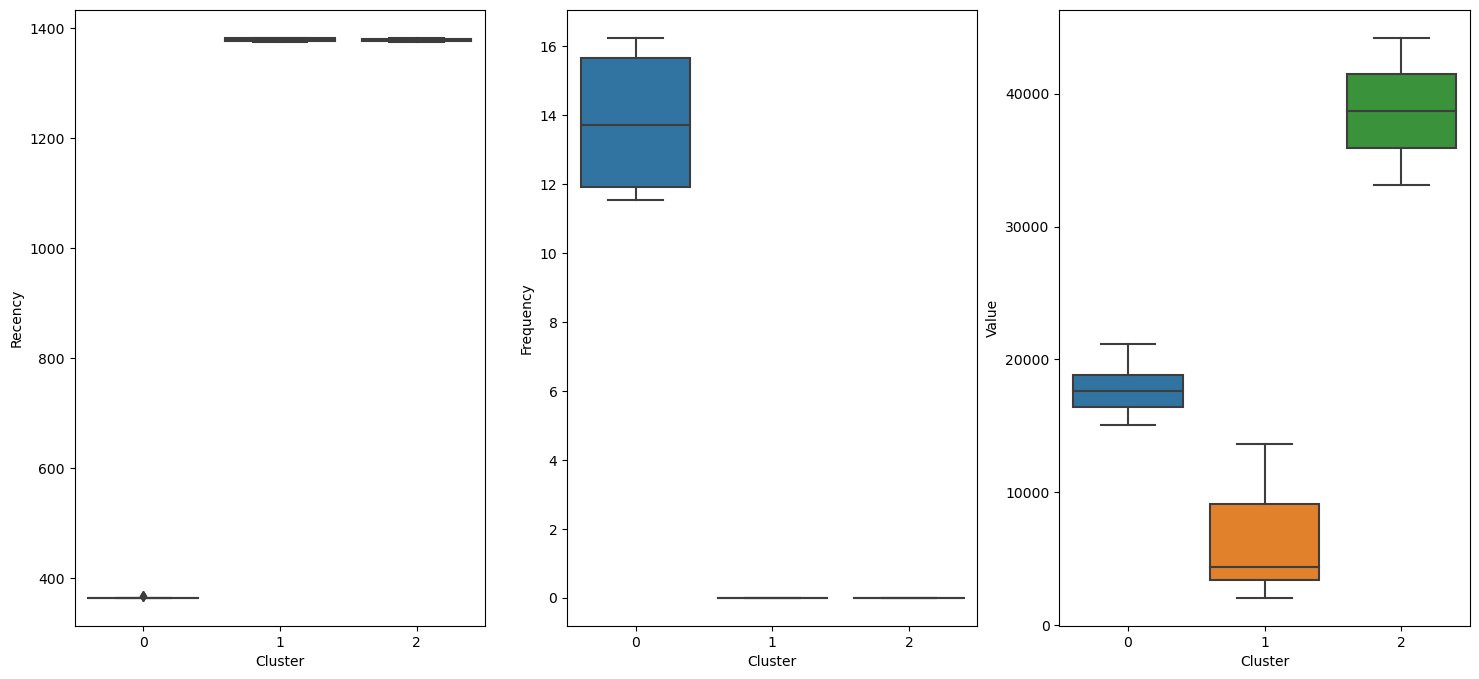

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(18, 8))
sns.boxplot(x='Cluster', y='Recency', data=Customers, ax=ax[0])
sns.boxplot(x='Cluster', y='Frequency', data=Customers, ax=ax[1])
sns.boxplot(x='Cluster', y='Value', data=Customers, ax=ax[2]);

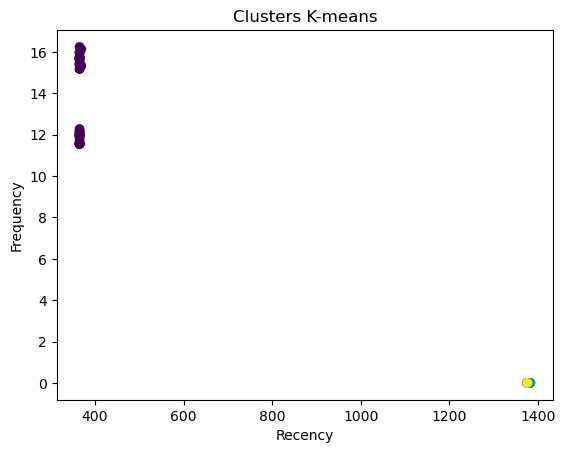

In [65]:
plt.scatter(Customers['Recency'],Customers['Frequency'], c = modelo_kmeans.labels_, cmap = 'viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Clusters K-means')
plt.show()

In [66]:
plt.scatter(Customers['Recency'],Customers['Value'], c = modelo_kmeans.labels_, cmap = 'viridis')
plt.xlabel('Recency')
plt.ylabel('Value')
plt.title('Clusters K-means')
plt.show()

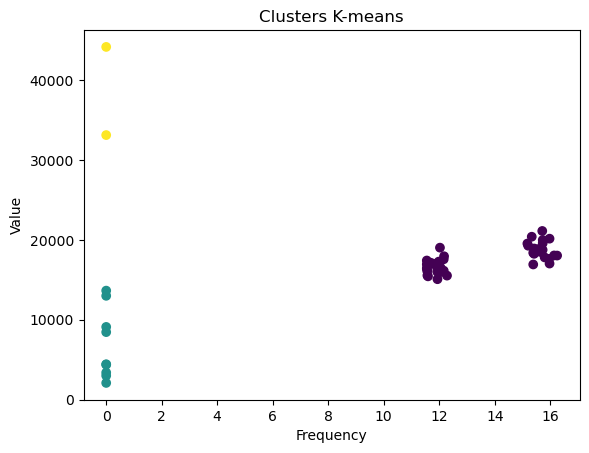

In [67]:
plt.scatter(Customers['Frequency'],Customers['Value'], c = modelo_kmeans.labels_, cmap = 'viridis')
plt.xlabel('Frequency')
plt.ylabel('Value')
plt.title('Clusters K-means')
plt.show()

In [70]:
Customers['Cluster'] = modelo_kmeans.labels_
Customers_estandarizados['Cluster'] = modelo_kmeans.labels_

In [69]:
Customers

Recency  Frequency         Value  Cluster
Adhir Samal                369.0  16.134328  18061.282353        0
Aditya Agarwal             365.0  15.382353  18388.117647        0
Ajay Mehta                1383.0   0.000000   3380.000000        1
Ajay Sharma                365.0  15.794118  17813.930233        0
Akhilesh Kumar             365.0  11.923077  16024.950820        0
Amit Singh                 365.0  15.970149  20163.755814        0
Aniruddha Kekapure         365.0  11.977528  17285.917355        0
Ashish Kumar               365.0  12.000000  16043.181818        0
Ashish Pandey              365.0  11.548387  17426.283333        0
Ashwini Adsare             365.0  16.242424  18046.476190        0
Aslam Raza                 365.0  15.661765  18909.494118        0
Atif Siddiqui              365.0  11.569892  15557.100000        0
Bijendra                   365.0  11.554348  16390.528926        0
Chandrakant Kasbe          365.0  12.275862  15531.750000        0
Dannana Jhammi             365.0  11.923077  16471.639344        0
Dilip Rathod              1382.0   0.000000   4368.000000        1
Firdoush Jabee             365.0  11.548387  16943.619835        0
Haridas Balraj             365.0  11.591398  15440.132231        0
Jagdeep                    365.0  11.932584  15082.058333        0
Javed Akhter               365.0  15.414286  18265.149425        0
Jay Prakash Kumar          365.0  15.382353  16929.670588        0
Jignesh Mhatre             365.0  15.970149  17041.941860        0
Kranti Bheke               365.0  15.171429  19549.127907        0
Kunal Patra                365.0  15.647059  18494.411765        0
Kundan Kumar               369.0  15.328571  20407.094118        0
Mohammed Abdul Kaleem      365.0  15.720588  18760.223529        0
Moinuddin Saifi            365.0  11.548387  16438.553719        0
Prakash Chamka            1377.0   0.000000  13650.000000        1
Rahul Kashyap              365.0  12.159091  16148.166667        0
Rahul Kumar Prajapati      365.0  15.707692  21128.364706        0
Rajesh Variya              365.0  12.170455  17958.200000        0
Rajiv Singh               1375.0   0.000000  13000.000000        1
Rakesh Kumar Sharma        365.0  15.200000  19278.546512        0
Ramkrishna Das Adhikary    365.0  15.567164  18858.258824        0
Ranjeet Kumar              365.0  12.055556  15983.446281        0
Ranjeet Mandal             365.0  11.791209  17010.446281        0
Rhushikesh Mane            365.0  15.666667  18604.209302        0
Rohan Kale                 365.0  15.417910  18930.447059        0
Roshan Zameer              365.0  11.692308  17146.892562        0
Sagar Jeur                 365.0  12.157303  17579.516393        0
Sajal Singhal              365.0  15.724638  19600.563218        0
Shanti Giri               1377.0   0.000000   8450.000000        1
Sharmili Pandit           1382.0   0.000000  44200.000000        2
Shivanand Sahani           365.0  11.565217  16093.892562        0
Suvankar Adhikary          365.0  12.044444  16525.663934        0
Suvankar Chakraborty       365.0  15.955882  17632.686047        0
Vijay Mehta               1378.0   0.000000   2080.000000        1
Vijaya singh              1382.0   0.000000   9100.000000        1
Vinod Bhave               1375.0   0.000000   2990.000000        1
Vinod Mehta                365.0  12.022472  19037.049587        0
Vinod Singh               1383.0   0.000000   4420.000000        1
Vipin Kumar                365.0  15.724638  19996.116279        0
Vishal Singh              1376.0   0.000000  33150.000000        2

In [71]:
Customers_estandarizados

Recency  Frequency     Value  Cluster
0  -0.502498   0.896669  0.221455        0
1  -0.512226   0.767789  0.272277        0
2   1.963508  -1.868577 -2.061443        1
3  -0.512226   0.838361  0.182992        0
4  -0.512226   0.174907 -0.095189        0
5  -0.512226   0.868531  0.548383        0
6  -0.512226   0.184239  0.100888        0
7  -0.512226   0.188091 -0.092354        0
8  -0.512226   0.110689  0.122714        0
9  -0.512226   0.915196  0.219152        0
10 -0.512226   0.815677  0.353349        0
11 -0.512226   0.114375 -0.167939        0
12 -0.512226   0.111711 -0.038343        0
13 -0.512226   0.235371 -0.171880        0
14 -0.512226   0.174907 -0.025730        0
15  1.961076  -1.868577 -1.907812        1
16 -0.512226   0.110689  0.047661        0
17 -0.512226   0.118061 -0.186127        0
18 -0.512226   0.176537 -0.241806        0
19 -0.512226   0.773262  0.253155        0
20 -0.512226   0.767789  0.045492        0
21 -0.512226   0.868531  0.062950        0
22 -0.512226   0.731639  0.452810        0
23 -0.512226   0.813157  0.288805        0
24 -0.502498   0.758571  0.586222        0
25 -0.512226   0.825759  0.330138        0
26 -0.512226   0.110689 -0.030875        0
27  1.948917  -1.868577 -0.464487        1
28 -0.512226   0.215357 -0.076029        0
29 -0.512226   0.823548  0.698377        0
30 -0.512226   0.217305  0.205426        0
31  1.944053  -1.868577 -0.565560        1
32 -0.512226   0.736536  0.410736        0
33 -0.512226   0.799464  0.345382        0
34 -0.512226   0.197612 -0.101643        0
35 -0.512226   0.152306  0.058053        0
36 -0.512226   0.816517  0.305878        0
37 -0.512226   0.773883  0.356607        0
38 -0.512226   0.135356  0.079270        0
39 -0.512226   0.215051  0.146541        0
40 -0.512226   0.826453  0.460809        0
41  1.948917  -1.868577 -1.273073        1
42  1.961076  -1.868577  4.285951        2
43 -0.512226   0.113574 -0.084469        0
44 -0.512226   0.195708 -0.017330        0
45 -0.512226   0.866086  0.154809        0
46  1.951349  -1.868577 -2.263590        1
47  1.961076  -1.868577 -1.171999        1
48  1.944053  -1.868577 -2.122087        1
49 -0.512226   0.191942  0.373184        0
50  1.963508  -1.868577 -1.899726        1
51 -0.512226   0.826453  0.522316        0
52  1.946485  -1.868577  2.567708        2

In [92]:
Customers['Customer_Name'] = sorted(df_wo_nulls["Customer_Name"].unique())
Customers

Recency  Frequency         Value  Cluster  \
Adhir Samal                369.0  16.134328  18061.282353        0   
Aditya Agarwal             365.0  15.382353  18388.117647        0   
Ajay Mehta                1383.0   0.000000   3380.000000        1   
Ajay Sharma                365.0  15.794118  17813.930233        0   
Akhilesh Kumar             365.0  11.923077  16024.950820        0   
Amit Singh                 365.0  15.970149  20163.755814        0   
Aniruddha Kekapure         365.0  11.977528  17285.917355        0   
Ashish Kumar               365.0  12.000000  16043.181818        0   
Ashish Pandey              365.0  11.548387  17426.283333        0   
Ashwini Adsare             365.0  16.242424  18046.476190        0   
Aslam Raza                 365.0  15.661765  18909.494118        0   
Atif Siddiqui              365.0  11.569892  15557.100000        0   
Bijendra                   365.0  11.554348  16390.528926        0   
Chandrakant Kasbe          365.0  12.275862  15531.750000        0   
Dannana Jhammi             365.0  11.923077  16471.639344        0   
Dilip Rathod              1382.0   0.000000   4368.000000        1   
Firdoush Jabee             365.0  11.548387  16943.619835        0   
Haridas Balraj             365.0  11.591398  15440.132231        0   
Jagdeep                    365.0  11.932584  15082.058333        0   
Javed Akhter               365.0  15.414286  18265.149425        0   
Jay Prakash Kumar          365.0  15.382353  16929.670588        0   
Jignesh Mhatre             365.0  15.970149  17041.941860        0   
Kranti Bheke               365.0  15.171429  19549.127907        0   
Kunal Patra                365.0  15.647059  18494.411765        0   
Kundan Kumar               369.0  15.328571  20407.094118        0   
Mohammed Abdul Kaleem      365.0  15.720588  18760.223529        0   
Moinuddin Saifi            365.0  11.548387  16438.553719        0   
Prakash Chamka            1377.0   0.000000  13650.000000        1   
Rahul Kashyap              365.0  12.159091  16148.166667        0   
Rahul Kumar Prajapati      365.0  15.707692  21128.364706        0   
Rajesh Variya              365.0  12.170455  17958.200000        0   
Rajiv Singh               1375.0   0.000000  13000.000000        1   
Rakesh Kumar Sharma        365.0  15.200000  19278.546512        0   
Ramkrishna Das Adhikary    365.0  15.567164  18858.258824        0   
Ranjeet Kumar              365.0  12.055556  15983.446281        0   
Ranjeet Mandal             365.0  11.791209  17010.446281        0   
Rhushikesh Mane            365.0  15.666667  18604.209302        0   
Rohan Kale                 365.0  15.417910  18930.447059        0   
Roshan Zameer              365.0  11.692308  17146.892562        0   
Sagar Jeur                 365.0  12.157303  17579.516393        0   
Sajal Singhal              365.0  15.724638  19600.563218        0   
Shanti Giri               1377.0   0.000000   8450.000000        1   
Sharmili Pandit           1382.0   0.000000  44200.000000        2   
Shivanand Sahani           365.0  11.565217  16093.892562        0   
Suvankar Adhikary          365.0  12.044444  16525.663934        0   
Suvankar Chakraborty       365.0  15.955882  17632.686047        0   
Vijay Mehta               1378.0   0.000000   2080.000000        1   
Vijaya singh              1382.0   0.000000   9100.000000        1   
Vinod Bhave               1375.0   0.000000   2990.000000        1   
Vinod Mehta                365.0  12.022472  19037.049587        0   
Vinod Singh               1383.0   0.000000   4420.000000        1   
Vipin Kumar                365.0  15.724638  19996.116279        0   
Vishal Singh              1376.0   0.000000  33150.000000        2   

                                   Customer_Name  
Adhir Samal                          Adhir Samal  
Aditya Agarwal                    Aditya Agarwal  
Ajay Mehta                            Ajay Mehta  
Ajay Sharma                          Aja

Ahora, vamos a implementar el número de Cluster en el df original en función del Customer_Name y así posteriormente hacer el recomendador en función del Cluster al que pertenzcan

In [94]:
df_final = pd.merge(df_wo_nulls, Customers, on = 'Customer_Name', how='inner' )

In [95]:
df_final

Order_Number State_Code   Customer_Name Order_Date      Status  \
0          139374         AP     Adhir Samal 2020-01-11   Delivered   
1          139500         MH     Adhir Samal 2020-03-24   Delivered   
2          139584         WB     Adhir Samal 2020-03-28   Delivered   
3          139626         TR     Adhir Samal 2020-03-29       Order   
4          139710         MH     Adhir Samal 2020-03-29       Order   
...           ...        ...             ...        ...         ...   
4341       139499         MH     Shanti Giri 2020-03-24  Processing   
4342       139503         MH  Prakash Chamka 2020-03-24  Processing   
4343       139511         MH    Vishal Singh 2020-03-25  Processing   
4344       139515         AN     Vinod Bhave 2020-03-26  Processing   
4345       139519         DL     Rajiv Singh 2020-03-26  Processing   

                     Product       Category            Brand     Cost  \
0                 512 GB M.2            SSD          Samsung   6500.0   
1                 260 GB SSD            SSD          Samsung   4500.0   
2     USB Backlight Keyboard       Keyboard             Dell    850.0   
3      Micro ATX motherboard          Mouse              MSI   6540.0   
4          Wireless Keyboard       Keyboard             Dell   1150.0   
...                      ...            ...              ...      ...   
4341                5 TB HDD            HDD  Western Digital   6500.0   
4342          12 GB DDR4 RAM  Computer Case            Hynix   3500.0   
4343     RYZEN 3rd gen. 3504            CPU            Intel   8500.0   
4344      Compact with 1 Fan        Cabinet             Asus   1150.0   
4345                6 TB HDD            HDD          Seagate  10000.0   

        Sales  Quantity  Total_Cost  Total_Sales Assigned Supervisor  Recency  \
0      8450.0       1.0      6500.0       8450.0         Ajay Sharma    369.0   
1      5850.0       1.0      4500.0       5850.0         Vijay Singh    369.0   
2      1105.0       4.0      3400.0       4420.0         Aarvi Gupta    369.0   
3      8502.0       1.0      6540.0       8502.0        Advika Joshi    369.0   
4      1495.0       4.0      4600.0       5980.0        Advika Joshi    369.0   
...       ...       ...         ...          ...                 ...      ...   
4341   8450.0       1.0      6500.0       8450.0         Aarvi Gupta   1377.0   
4342   4550.0       3.0     10500.0      13650.0         Ajay Sharma   1377.0   
4343  11050.0       3.0     25500.0      33150.0         Aarvi Gupta   1376.0   
4344   1495.0       2.0      2300.0       2990.0         Ajay Sharma   1375.0   
4345  13000.0       1.0     10000.0      13000.0        Roshan Kumar   1375.0   

      Frequency         Value  Cluster  
0     16.134328  18061.282353        0  
1     16.134328  18061.282353        0  
2     16.134328  18061.282353        0  
3     16.134328  18061.282353        0  
4     16.134328  18061.282353        0  
...         ...           ...      ...  
4341   0.000000   8450.000000        1  
4342   0.000000  13650.000000        1  
4343   0.000000  33150.000000        2  
4344   0.000000   2990.000000        1  
4345   0.000000  13000.000000        1  

[4346 rows x 18 columns]

In [103]:
df_final.to_excel('dataset_online_Ecommerce_clusterizado.xlsx', index = False)

Ahora vamos a hacer un recomendador de producto. Fijemos en primer lugar los objetivos: 
1. Cada vez que el cliente entre (vamos a suponer que no es un cliente nuevo), se le recomendará productos que clientes con compras parecidas a las suyas compraron despues (de su mismo cluster en funcion del analisis RFM). 
2. Si es un nuevo cliente -> Se le asigna el producto que más se haya vendido en el último mes. 

En este caso, la recomendación saldra cuando te logeas en la aplicación. Es una recomendación personalizada. 

# Filtrado colaborativo User-User

La idea es que si el usuario A es parecido al usuario B, y al usuario A compra el objeto X, entonces es probable que el usuario B compre el objeto X.

Tambien es buena idea la parte de Algoritmos A priori - Conjuntos que se basan en la siguiente idea: 
    Si un cliente ha comprado los productos 1 y 2, ¿Cual le recomendamos? (Esta recomendación viene en función de clientes que hayan comprado los productos 1 y 2)